In [4]:
import myutils

img = myutils.load_normalized_img('castle.jpg')
input = myutils.img_to_tensor(img)

import torchvision

model = torchvision.models.vgg16(pretrained=True)
model.eval()

# import utils
# import torch

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
import torch
from torchvision.models import vgg16
from zennit.attribution import SmoothGrad
from zennit.composites import EpsilonGammaBox
from zennit.torchvision import VGGCanonizer

# instatiate the model
model = vgg16()
# create the canonizers
canonizers = [VGGCanonizer()]
# EpsilonGammaBox needs keyword arguments 'low' and 'high'
high = torch.full_like(input, 4)
composite = EpsilonGammaBox(low=-high, high=high, canonizers=canonizers)

with SmoothGrad(model, composite) as attributor:
     # gradient/ relevance wrt. output/class 0
     # torchvision.vgg16 has 1000 output classes by default
     output, relevance = attributor(input, torch.eye(1000)[[0]])

print('EpsilonGammaBox:', relevance)

EpsilonGammaBox: tensor([[[[4.4748e-06, 7.4632e-06, 9.5535e-06,  ..., 6.3329e-06,
           3.2266e-06, 3.3809e-06],
          [8.8766e-06, 1.3982e-05, 1.5753e-05,  ..., 9.4589e-06,
           5.8583e-06, 5.9594e-06],
          [9.6463e-06, 1.6194e-05, 1.9857e-05,  ..., 6.6099e-06,
           9.4999e-06, 8.3330e-06],
          ...,
          [4.2684e-06, 4.3922e-06, 1.1344e-05,  ..., 9.5077e-06,
           9.6475e-06, 4.9482e-06],
          [1.9394e-06, 7.3213e-06, 8.1875e-06,  ..., 4.0176e-06,
           4.9028e-06, 3.0635e-06],
          [5.4618e-07, 1.4280e-06, 1.5038e-06,  ..., 3.4579e-06,
           3.1578e-06, 1.6060e-06]],

         [[4.3864e-06, 8.5715e-06, 9.0777e-06,  ..., 1.1440e-05,
           4.4393e-06, 4.6665e-06],
          [9.0364e-06, 1.5143e-05, 1.8176e-05,  ..., 1.4122e-05,
           6.3892e-06, 6.3361e-06],
          [1.0740e-05, 1.8522e-05, 1.9695e-05,  ..., 3.6395e-06,
           1.3052e-05, 9.1231e-06],
          ...,
          [4.0936e-06, 1.4709e-06, 1.3852e

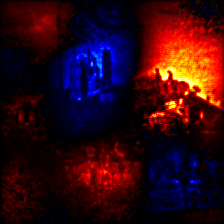

In [13]:
from zennit.image import imgify

# sum over the color channels
heatmap = relevance.sum(1)
# get the absolute maximum, to center the heat map around 0
amax = heatmap.abs().numpy().max((1, 2))

# save heat map with color map 'coldnhot'
imgify(
    heatmap[0],
    vmin=-amax,
    vmax=amax,
    cmap='coldnhot',
    level=1.0
)